In [1]:
import pandas as pd

In [2]:
import io
#df= pd.read_csv(io.BytesIO(uploaded['student-mat.csv']),sep = ';')

df= pd.read_csv('https://raw.githubusercontent.com/dieulien/datamining/master/student-por.csv', sep = ';')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.shape

(649, 33)

In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
df.dropna()
record = df.drop(['G1','G2','G3','school','address'], axis = 1)
record.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,GT3,A,4,4,at_home,teacher,course,mother,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,GT3,T,1,1,at_home,other,course,father,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,LE3,T,1,1,at_home,other,other,mother,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,GT3,T,4,2,health,services,home,mother,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,GT3,T,3,3,other,other,home,father,...,yes,no,no,4,3,2,1,2,5,0


In [8]:
record.higher = record.higher.map(dict(yes=1, no=0))
record.sex = record.sex.map(dict(F=1, M=0))
record.internet = record.internet.map(dict(yes=1, no=0))
record.schoolsup = record.schoolsup.map(dict(yes=1, no=0))
record.famsup = record.famsup.map(dict(yes=1, no=0))
record.paid  = record.paid.map(dict(yes=1, no=0))
record.activities = record.activities.map(dict(yes=1, no=0))
record.nursery = record.nursery.map(dict(yes=1, no=0))
record.romantic = record.romantic.map(dict(yes=1, no=0))
record.famsize = record.famsize.map(dict(GT3=1, LE3=0))
record.Pstatus = record.Pstatus.map(dict(A=1, T=0))
record.Mjob = record.Mjob.map(dict(teacher=0, health=1, services=2, at_home=3,other=4))
record.Fjob = record.Fjob.map(dict(teacher=0, health=1, services=2, at_home=3,other=4))
record.reason = record.reason.map(dict(course=0, home=1, reputation=2, other=3))
record.guardian = record.guardian.map(dict(mother=0, father=1, other=3))


In [9]:
record.astype(np.int64)

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,18,1,1,4,4,3,0,0,0,...,1,0,0,4,3,4,1,1,3,4
1,1,17,1,0,1,1,3,4,0,1,...,1,1,0,5,3,3,1,1,3,2
2,1,15,0,0,1,1,3,4,3,0,...,1,1,0,4,3,2,2,3,3,6
3,1,15,1,0,4,2,1,2,1,0,...,1,1,1,3,2,2,1,1,5,0
4,1,16,1,0,3,3,4,4,1,1,...,1,0,0,4,3,2,1,2,5,0
5,0,16,0,0,4,3,2,4,2,0,...,1,1,0,5,4,2,1,2,5,6
6,0,16,0,0,2,2,4,4,1,0,...,1,1,0,4,4,4,1,1,3,0
7,1,17,1,1,4,4,4,0,1,0,...,1,0,0,4,1,4,1,1,1,2
8,0,15,0,1,3,2,2,4,1,0,...,1,1,0,4,2,2,1,1,1,0
9,0,15,1,0,3,4,4,4,1,0,...,1,1,0,5,5,1,1,1,5,0


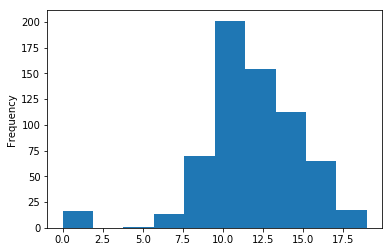

In [10]:
result_col = df['G3']
result_col.plot.hist()

In [12]:
# def catize(num):
#   if num <= 4:
#     return 0
#   elif num <= 8:
#     return 1
#   elif num <= 12:
#     return 2
#   elif num <= 16:
#     return 3
#   elif num <= 20:
#     return 4
def catize(num):
    if num <= 12:
      return 0
    else:
      return 1

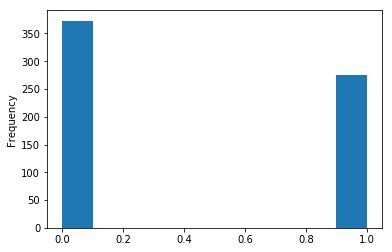

In [13]:
resultt = result_col.map(catize)
resultt.plot.hist()

In [14]:
result = resultt
result.dtype

dtype('int64')

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [15]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(record, result)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [16]:
atts = []
for i in indices:
  atts.append(record.columns[i])  

Feature ranking:
1. feature studytime (0.052278)
2. feature failures (0.052213)
3. feature Medu (0.049773)
4. feature higher (0.047285)
5. feature absences (0.046291)
6. feature age (0.046178)
7. feature health (0.045796)
8. feature Walc (0.045352)
9. feature goout (0.042569)
10. feature Fedu (0.042173)
11. feature reason (0.041202)
12. feature Mjob (0.040657)
13. feature freetime (0.039944)
14. feature famrel (0.037725)
15. feature Dalc (0.034840)
16. feature traveltime (0.034735)
17. feature Fjob (0.033002)
18. feature famsup (0.031475)
19. feature sex (0.031155)
20. feature guardian (0.027634)
21. feature activities (0.025884)
22. feature romantic (0.025691)
23. feature schoolsup (0.025036)
24. feature internet (0.024015)
25. feature famsize (0.023950)
26. feature nursery (0.023751)
27. feature Pstatus (0.017214)
28. feature paid (0.012182)


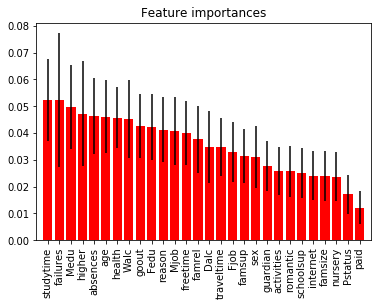

In [17]:
print("Feature ranking:")

for f in range(record.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, atts[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(record.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(record.shape[1]), atts, rotation=90)
plt.xlim([-1, record.shape[1]])
plt.show()

In [18]:
top10 = atts[:10]
top10df = df[top10]
top10df.head()

,studytime,failures,Medu,higher,absences,age,health,Walc,goout,Fedu
0,2,0,4,yes,4,18,3,1,4,4
1,2,0,1,yes,2,17,3,1,3,1
2,2,0,1,yes,6,15,3,3,2,1
3,3,0,4,yes,0,15,5,1,2,2
4,2,0,3,yes,0,16,5,2,2,3


Histogram of featurestudytime


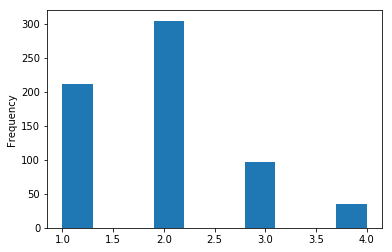

In [19]:

att = top10[0]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featurefailures


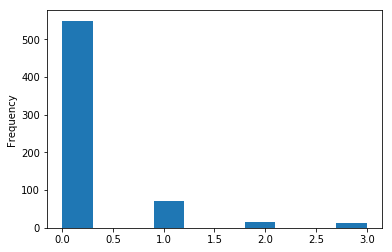

In [20]:
att = top10[1]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featureMedu


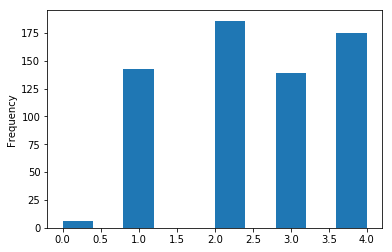

In [21]:
att = top10[2]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featurehigher


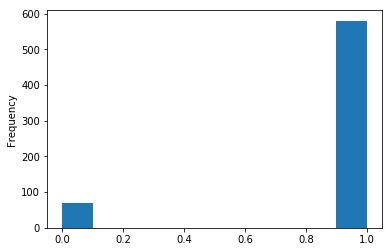

In [22]:
att = top10[3]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featureabsences


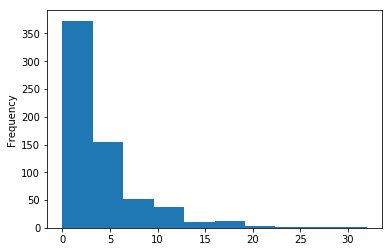

In [23]:
att = top10[4]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featureage


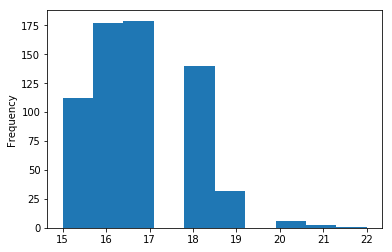

In [24]:
att = top10[5]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featurehealth


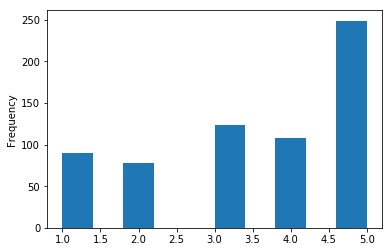

In [25]:
att = top10[6]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featureWalc


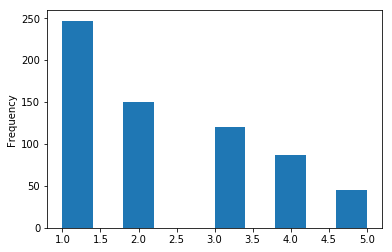

In [26]:
att = top10[7]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featuregoout


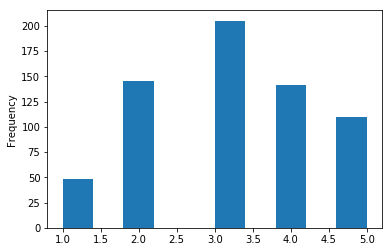

In [27]:
att = top10[8]
print("Histogram of feature" + att)
record[att].plot.hist()

Histogram of featureFedu


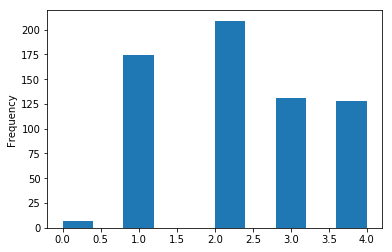

In [28]:
att = top10[9]
print("Histogram of feature" + att)
record[att].plot.hist()

In [29]:
training_data = record[atts[:10]]
training_data.head()

,studytime,failures,Medu,higher,absences,age,health,Walc,goout,Fedu
0,2,0,4,1,4,18,3,1,4,4
1,2,0,1,1,2,17,3,1,3,1
2,2,0,1,1,6,15,3,3,2,1
3,3,0,4,1,0,15,5,1,2,2
4,2,0,3,1,0,16,5,2,2,3


In [30]:
from google.colab import drive
drive.mount('drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
training_data.to_csv('b_data_por.csv')
!cp b_data_por.csv drive/My\ Drive/

In [ ]:
resultt.to_csv('b_categorized_por_result.csv')
!cp b_categorized_por_result.csv drive/My\ Drive/

In [ ]:
result_col.to_csv('b_por_result.csv')
!cp b_por_result.csv drive/My\ Drive/